## Principal Component Analysis for Data Visualization

In this tutorial we will implement Principal Component Analysis for data visualization purposes!

In [1]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 1. Penguins Data Example

#### Exploratory Data Analysis

In [2]:
penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
penguins.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
211,Chinstrap,Dream,45.6,19.4,194.0,3525.0,Female
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,Male
214,Chinstrap,Dream,45.7,17.0,195.0,3650.0,Female
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,Female
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,Female
75,Adelie,Torgersen,42.8,18.5,195.0,4250.0,Male
51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,Male
275,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,Male
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df = penguins.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
df = df.drop(['island', 'sex'], axis = 1)

In [8]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


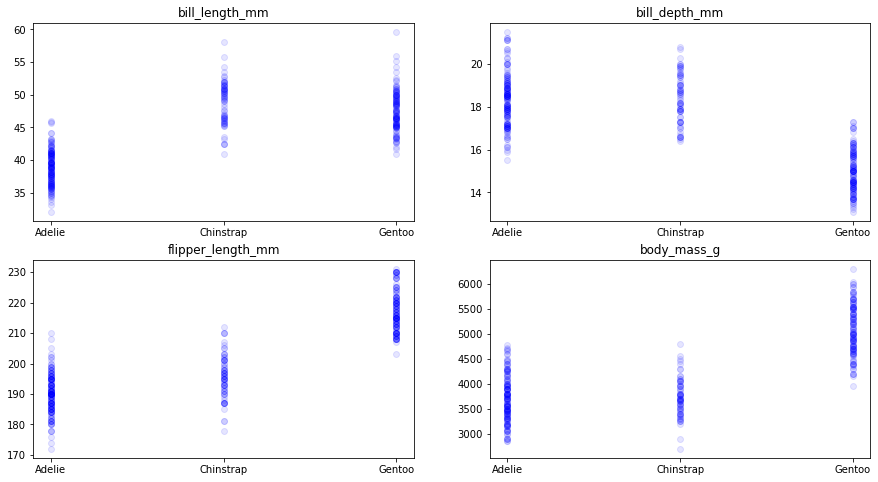

In [9]:
fig = plt.figure(figsize=(15, 8))

# Iterating over each numeric column 
for i in range(1, 5):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df['species'], df.iloc[:, i], c='b', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.species.unique())

In [10]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [11]:
# Input Variable:
X = df.drop(['species'], axis = 1)

# Target Variable:
y = df['species']

#### Scaling

In [12]:
# Instantiate a new scaler
scaler = StandardScaler()
# Learn the pattern from the input data
scaler.fit(X)
#Apply the pattern
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

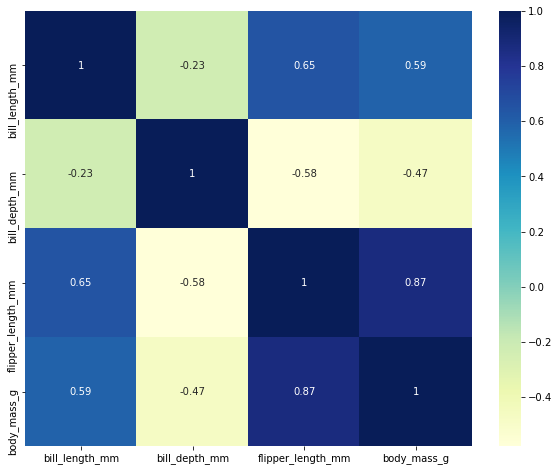

In [13]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

In [14]:
X_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,3.840772e-16,6.401286e-16,2.133762e-16,-1.707010e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00


#### PCA

In [15]:
pca = PCA(n_components=4)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())

[0.68633893 0.19452929 0.09216063 0.02697115]
0.880868224204992


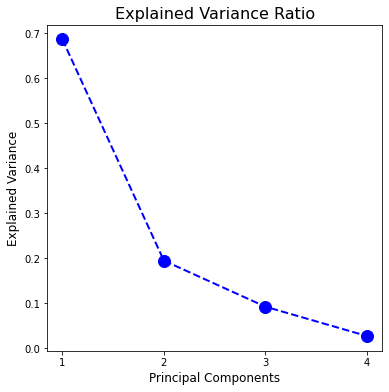

In [16]:
# Visual for each component's explained variance
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pca.explained_variance_ratio_, 'bo--', linewidth=2, markersize=12)
ax.set_xlabel('Principal Components', fontsize = 12)
ax.set_ylabel('Explained Variance', fontsize = 12)
ax.set_title('Explained Variance Ratio', fontsize = 16)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

The first two principal components explains 88% of the variance, so we will keep 2 components.

#### Projecting data onto 2 principal component space:

In [17]:
# Projection onto 2 principal components space: 
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
principalComponents = pca2.fit_transform(X_scaled)
# Define new dataframe with principal components
df_pca = pd.DataFrame(data = principalComponents, 
                      columns = ['principal component 1', 'principal component 2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

In [18]:
df_pca.sample(10)

,principal component 1,principal component 2,species
41,-1.929256,0.342882,Adelie
98,-2.002435,-0.213819,Adelie
65,-1.269344,-0.005466,Adelie
203,-0.137644,1.676745,Chinstrap
63,-0.592026,0.685887,Adelie
262,1.702927,-0.310212,Gentoo
19,-1.581138,-0.603933,Adelie
269,0.999995,-1.331427,Gentoo
102,-1.984794,-0.820883,Adelie
218,2.234559,-0.563287,Chinstrap


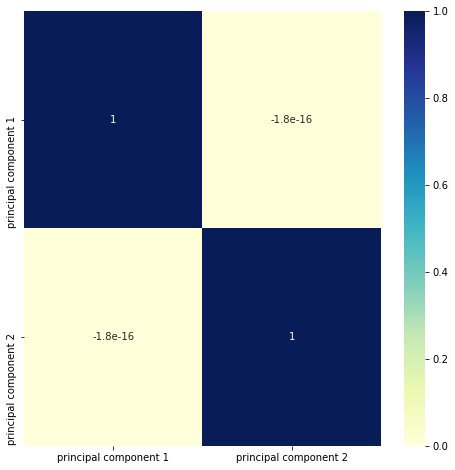

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df_pca.corr(), annot=True, cmap="YlGnBu");

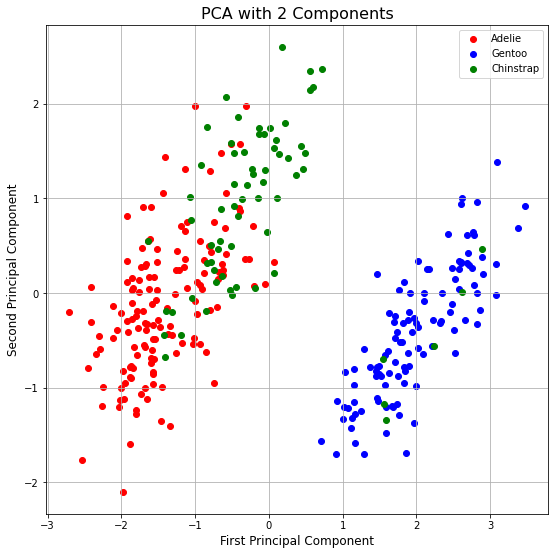

In [20]:
# Visualization od Penguins Data in 2-D
fig, ax = plt.subplots(figsize=(9,9))

for spe, color in zip(('Adelie', 'Gentoo', 'Chinstrap'), ('red', 'blue', 'green')):
    index = df_pca['species'] == spe
    ax.scatter(df_pca.loc[index, 'principal component 1'],
               df_pca.loc[index, 'principal component 2'], 
               c = color)

ax.set_xlabel('First Principal Component', fontsize = 12)
ax.set_ylabel('Second Principal Component', fontsize = 12)
ax.set_title('PCA with 2 Components', fontsize = 16)
ax.legend(['Adelie', 'Gentoo', 'Chinstrap'])
ax.grid();

### 2. Random Data Example

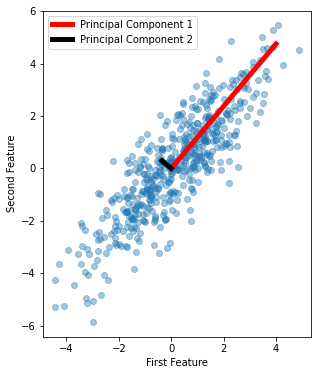

In [21]:
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3],
       [3, 4]]

X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)

colors = ['r', 'k']
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], alpha=.4)

for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, -comp[0]], [0, -comp[1]], label=f"Principal Component {i+1}", linewidth=5, color=colors[i])

plt.gca().set(aspect='equal', xlabel='First Feature', ylabel='Second Feature')
plt.legend()
plt.show()


In [22]:
# Projection onto 2 principal components space: 
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca3 = PCA(n_components=2).fit(X)
principalComponents = pca3.fit_transform(X)
# Define new dataframe with principal components
df_pca3 = pd.DataFrame(data = principalComponents, 
                      columns = ['principal component 1', 'principal component 2'])
df_pca3

,principal component 1,principal component 2
0,1.362722,0.608051
1,-1.136453,0.061240
2,0.526563,0.135637
3,1.333660,-1.227753
4,-0.182986,0.157287
...,...,...
495,3.380556,-0.486699
496,3.308759,-0.205033
497,0.449635,0.064979
498,3.527958,0.122484


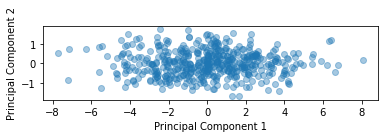

In [23]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df_pca3.loc[:, 'principal component 1'], df_pca3.loc[:, 'principal component 2'], alpha=.4);
plt.gca().set(aspect='equal', xlabel='Principal Component 1', ylabel='Principal Component 2')
plt.show()
